# Collective heating (in cuvette)

In [1]:
import numpy as npy
import EMfields as em
import RefractiveIndex as ri
import matplotlib.pyplot as plt
import opticalCrossSection as ocs

In [2]:
# 5 nm AuNS
r1 = 2.5
wl, N, N1, N2, mu1, mu2 = ri.setupRI('Au','Au','Water',r1,r1,300,800,False,False)
Csca, Cext, Cabs, Cbck = ocs.sphereCS(wl*(1e9),N2,N,mu2,r1)
wl1 = npy.delete(wl,len(wl)-1)
Cabs1 = npy.delete(Cabs,len(Cabs)-1)*(1e-18)
Vnp1 = 4*npy.pi*((r1*(1e-9))**3)/3

# 50 nm AuNS
r2 = 25
wl, N, N1, N2, mu1, mu2 = ri.setupRI('Au','Au','Water',r2,r2,300,800,False,False)
Csca, Cext, Cabs, Cbck = ocs.sphereCS(wl*(1e9),N2,N,mu2,r2)
wl2 = npy.delete(wl,len(wl)-1)
Cabs2 = npy.delete(Cabs,len(Cabs)-1)*(1e-18)
Vnp2 = 4*npy.pi*((r2*(1e-9))**3)/3

# 100 nm AuNS
r3 = 50
wl, N, N1, N2, mu1, mu2 = ri.setupRI('Au','Au','Water',r3,r3,300,800,False,False)
Csca, Cext, Cabs, Cbck = ocs.sphereCS(wl*(1e9),N2,N,mu2,r3)
wl3 = npy.delete(wl,len(wl)-1)
Cabs3 = npy.delete(Cabs,len(Cabs)-1)*(1e-18)
Vnp3 = 4*npy.pi*((r3*(1e-9))**3)/3

In [8]:
# Absorption CS at 532 nm
pos_532 = 118
Cabs = npy.array([Cabs1[pos_532], Cabs2[pos_532], Cabs3[pos_532]])

# NP volumes
Vnp = npy.array([Vnp1, Vnp2, Vnp3])

# Joule number
lambda_ref = 1240e-9
const = lambda_ref/(2*npy.pi)
Jo = const*Cabs/Vnp

In [4]:
# Parâmetros materiais
Cmass = 1e-2                        # NP mass concentration [kg/m^3] (10 ug/mL)
a = 22e-3                           # Altura do líquido na cubeta (m)
b = 1e-3                            # Espessura da líquido na cubeta (m)
l = 10e-3                           # Comprimento do caminho óptico (largura da cubeta - m)
rho_h2o = 1000                      # Densidade do meio (kg/m^3)
rho_np = 19300                      # Densidade da NP (kg/m^3)
cp_h2o = 4200                       # Calor específico do meio (J/kg.K)
h = 35                              # Coeficiente de transferência de calor convectivo(W/m ^ 2.K)    # Ref.:
                                    # https://www.engineersedge.com/heat_transfer/convective_heat_transfer_coefficients__13378.htm

# Parâmetros do Laser
Pexc = 1                            # Potência média do Laser (W)
f = 80e6                            # Taxa de repetição do Laser (Hz)

# NP concentration (same material concentration among samples) 
Cnp = Cmass/(rho_np*Vnp)

In [5]:
# Parâmetros calculados
S = 2*(a*b + a*l + b*l)             # Somatório das áreas em que há perda convectiva(m ^ 2)
V = a*b*l                           # Volume do líquido na cubeta (m^3)
I = Pexc/(a*b)                      # Intensidade do feixe (W/m^2)
E0 = Cabs*I/f                       # Energia absorvida por uma nanopartícula (J)
E = Cnp*E0                          # Densidade volumétrica de energia absorvida na amostra(J/m ^ 3)
B = h*S/(rho_h2o*cp_h2o*V)          # Fator de perda de calor (1/s)

In [6]:
t = npy.linspace(0, 900, num=200)
Ta = ((Cnp[0]*Cabs[0]*I)/(rho_h2o*cp_h2o*B))*(1-npy.exp(-B*t))
Tb = ((Cnp[1]*Cabs[1]*I)/(rho_h2o*cp_h2o*B))*(1-npy.exp(-B*t))
Tc = ((Cnp[2]*Cabs[2]*I)/(rho_h2o*cp_h2o*B))*(1-npy.exp(-B*t))

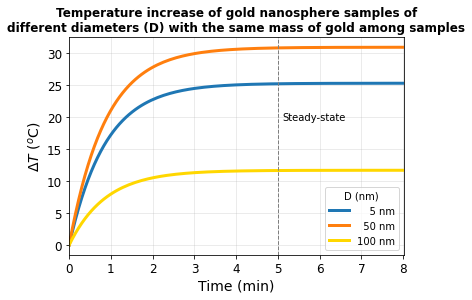

In [7]:
fig3 = plt.figure(3)
ax3 = plt.gca()
lines3 = plt.plot(t/60, Ta, 'tab:blue', t/60, Tb, 'tab:orange', t/60, Tc, 'gold', linewidth=3)
plt.axvline(x = 5, linewidth=1, linestyle='--', color ='tab:gray') 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.rcParams['figure.figsize'] = (10, 5)
plt.legend(lines3[:3], ['    5 nm', '  50 nm', '100 nm'], title="D (nm)", fontsize=10)
plt.text(5.1, 19.5, 'Steady-state', fontsize=10)
plt.title('Temperature increase of gold nanosphere samples of\ndifferent diameters (D) with the same mass of gold among samples', fontweight='bold')
plt.ylabel('$\Delta T$ ($^{o}$C)', fontsize=14)
plt.xlabel('Time (min)', fontsize=14)
plt.xlim([-0.01, 8.01])
plt.grid(alpha=0.3)
plt.show()


#### Joule number trend

In [17]:
d = npy.array([5, 50, 100])                 # Au nanospheres diameter
T = npy.array([Ta[-1], Tb[-1], Tc[-1]])     # Temperature increase

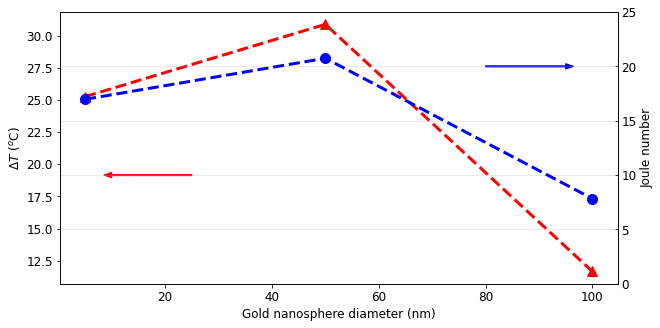

In [41]:
fig3 = plt.figure(3)
ax3 = plt.gca()
plt.plot(d,T,'^--', color='r', markersize=10, linewidth=3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('$\Delta T$ ($^{o}$C)', fontsize=12)
plt.xlabel('Gold nanosphere diameter (nm)', fontsize=12)
#plt.ylim([0, 35])
ax31 = ax3.twinx()
ax31.plot(d,Jo,'o--', color='b', markersize=10, linewidth=3)
ax31.yaxis.set_tick_params(which='major', direction='in', top='on', labelcolor = 'k')
ax31.set_ylabel('Joule number',color="k", fontsize=12)
ax31.tick_params(axis='y', labelsize=12)
ax31.set_ylim([0, 25])
plt.grid(alpha=0.3)
plt.arrow(80, 20, 15, 0, width = 0.1, color='b', head_width = 0.5, head_length = 1.5)
plt.arrow(25, 10, -15, 0, width = 0.1, color='r', head_width = 0.5, head_length = 1.5)
plt.show()
